In [3]:
import pandas as pd
churn_data = pd.read_csv('C:/Users/админ/Desktop/IDE/SKILLFACTORY/PHITON 13/DATA/churn/churn.csv')
display(churn_data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [4]:
import matplotlib.pyplot as plt

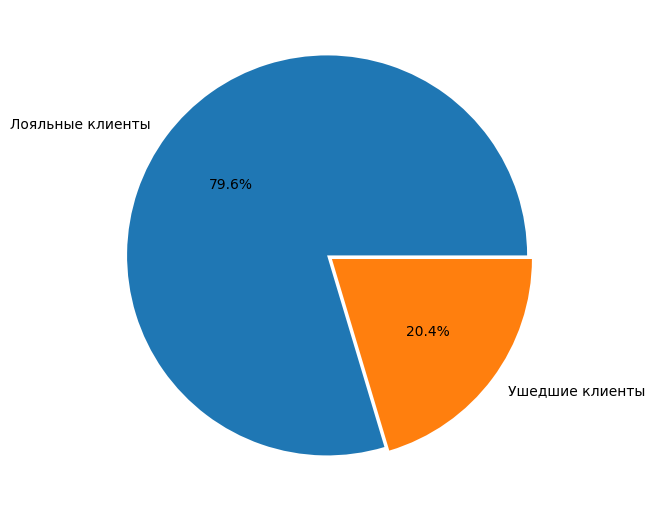

In [6]:
exited = churn_data["Exited"].value_counts()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited,
    labels=["Лояльные клиенты", "Ушедшие клиенты"],
    autopct='%.1f%%',
    explode = [0.03, 0]);


**Вывод:** из полученного графика видно, что ушедших клиентов в 4 раза меньше, чем лояльных.

##### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [27]:
import seaborn as sns

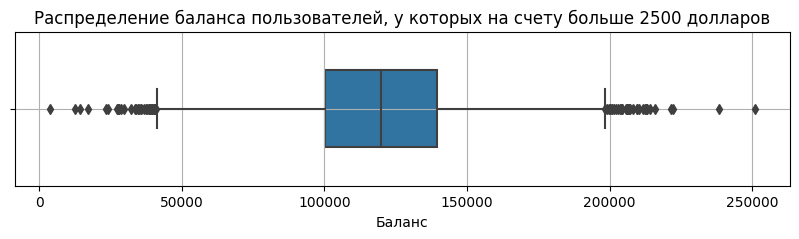

In [28]:
fig = plt.figure(figsize=(10, 2))
boxplot = sns.boxplot(
    data=churn_data[churn_data['Balance'] > 2500],
    x='Balance',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение баланса пользователей, у которых на счету больше 2500 долларов');
boxplot.set_xlabel('Баланс');
boxplot.grid()

**Вывод:** мы видим что меддианное значение баланса пользователей, у которых на счету больше 2500 долларов составляет 120000 долларов. Значение 25% квантиля равно 100000 долларов Значение 75% квантиля равно 140000 долларов. Распределение похоже на нормальное.

##### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
churn_data_copy = churn_data.copy()

In [31]:
churn_data_copy['Exited'] = churn_data_copy['Exited'].astype('category') 
churn_data_copy['Exited'] = churn_data_copy['Exited'].cat.rename_categories({
    1 : 'Ушедшие',
    0 : 'Лояльные'
})

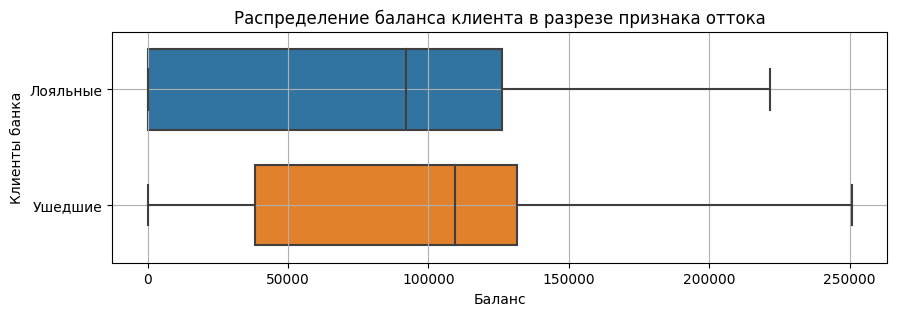

In [32]:
fig = plt.figure(figsize = (10,3))
boxplot = sns.boxplot(
    data = churn_data_copy,
    x = 'Balance',
    y = 'Exited',
    orient= 'h',
    width=0.7
)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока')
boxplot.set_xlabel('Баланс')
boxplot.set_ylabel('Клиенты банка')
boxplot.grid()

**Вывод:** баланс лояльных клиентов имеет более широкий диапазон (от 0 до 250000 долларов). Межквартильный размах в группе ушедших достаточно большой. Медианное значение баланса ушедших клиентов составляет 90000 долларов. 

Мы видим большое смещение лояльных клиентов к нулю, это вызвано большим количеством клиентов с нулевым балансом. Стоит отдельно рассмотреть клиентов с нулевым балансом. Аналитику с исключением клиентов с нулевым балансом или балансом выше определенной суммы можно было сделать дополнительно

##### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

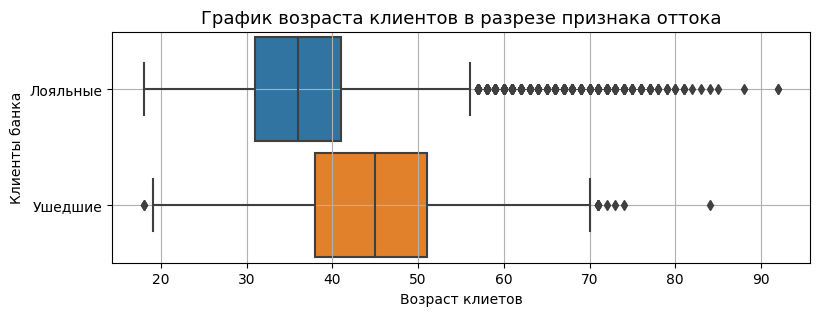

In [33]:
fig = plt.figure(figsize=(9, 3))
boxplot = sns.boxplot(
    data=churn_data_copy,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('График возраста клиентов в разрезе признака оттока', fontsize=13);
boxplot.set_xlabel('Возраст клиетов');
boxplot.set_ylabel('Клиенты банка');
boxplot.grid()

**Вывод:** группа лояльных кллиентов имеет более молодой возраст (от 18 до 57), чем группа ушедших(от 19 до 70). Медианное значение ушедших клиентов 45 лет.В группе лояльных клиентов больше потенциальных выбросов. 



##### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Text(0, 0.5, 'Предполагаемая зарплата')

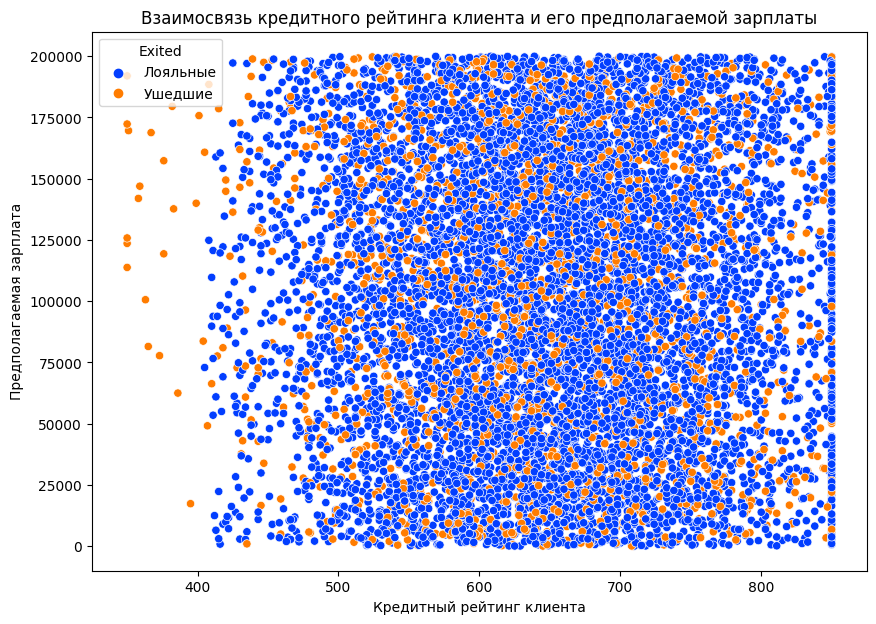

In [40]:
fig = plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='CreditScore',
    y='EstimatedSalary',
    data=churn_data_copy,
    palette='bright',
    hue='Exited',
)
plt.title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
plt.xlabel('Кредитный рейтинг клиента')
plt.ylabel('Предполагаемая зарплата')


**Вывод:** как видно из данного графика кредитный рейтинг клиента не зависит от его предполагаемой зарплаты.



Можно отметить, что только у ушедших клиентов есть рейтинг ниже 400.

##### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.Подсказка:Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

In [15]:
import plotly
import plotly.express as px

Text(0.5, 1.0, 'Зависимость ушедших клиентов от пола')

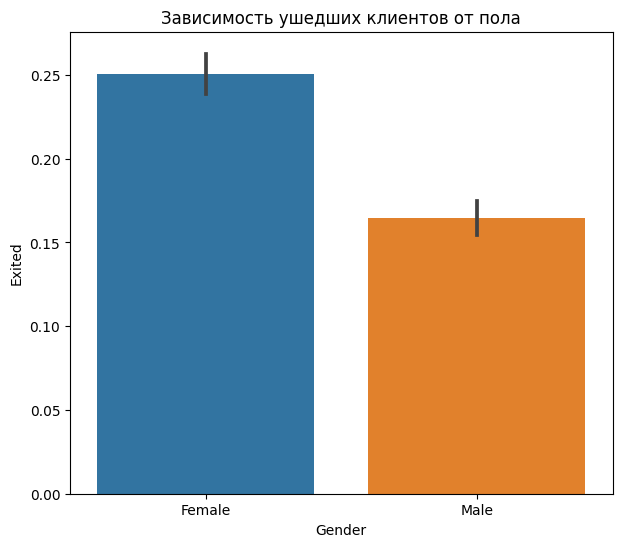

In [42]:
fig = plt.figure(figsize=(7, 6))
barplot = sns.barplot(
    data=churn_data,
    x='Gender',
    y='Exited'
)
barplot.set_title('Зависимость ушедших клиентов от пола')


**Вывод:** из данного графика видно, что клиентов женского пола, покинувших банк больше чем мужского в 1.5 раза.

Также можно было также посчитать по-другому. Можно было взять всех ушедших клиентов и посмотреть долю мужчин и женщин от всего 100% ушедших клиентов.

ValueError: 'label' must be of length 'x'

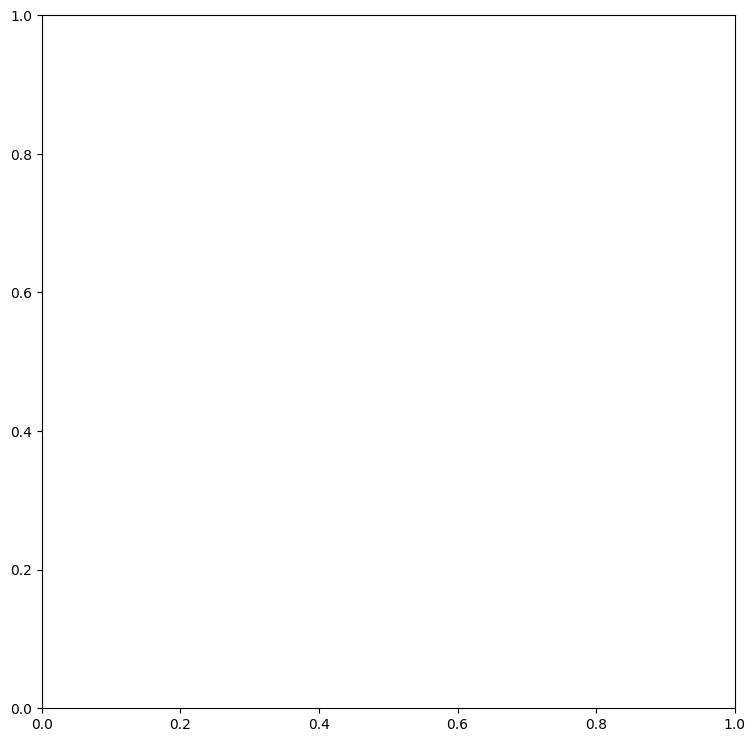

In [5]:
gone = churn_data[churn_data['Exited'] == 'Ушедший']
fig, axes = plt.subplots(figsize=(9, 9))
axes.pie(
gone['Gender'].value_counts(), # берем данные об ушедших клиентах
labels=['Женщины', 'Мужчины'],
autopct='%.1f%%', #округление до первого знака после запятой
explode=[0.1, 0] #доля смещения от центра
)

##### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [17]:
import seaborn as sns

Text(0, 0.5, 'Число клиентов')

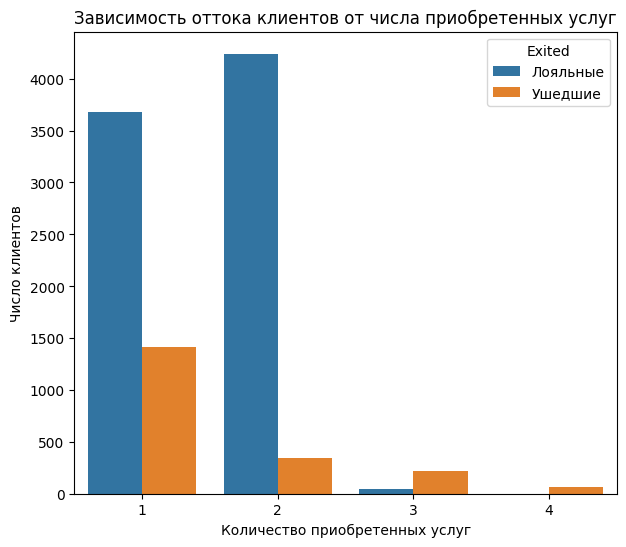

In [43]:
grouped_row = churn_data_copy.groupby(['NumOfProducts', 'Exited'], as_index=False)['RowNumber'].count()
fig = plt.figure(figsize=(7, 6))
barplot = sns.barplot(
    data=grouped_row,
    x='NumOfProducts',
    y='RowNumber',
    hue='Exited',
    orient='v'
)
barplot.set_title('Зависимость оттока клиентов от числа приобретенных услуг')
plt.xlabel('Количество приобретенных услуг')
plt.ylabel('Число клиентов')

**Вывод:** чем больше клиенты приобрели у банка услуг, тем меньше отток. Также мы видим, что большинство клиентов приобрели по 1, 2 услуги. Лояльных клиентов, кторые бы приобрели максимальное количество услуг (4) - нет.

##### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [19]:
churn_data_copy['IsActiveMember']=churn_data['IsActiveMember'].apply(lambda x: "Неактивный" if x==0 else "Активный")

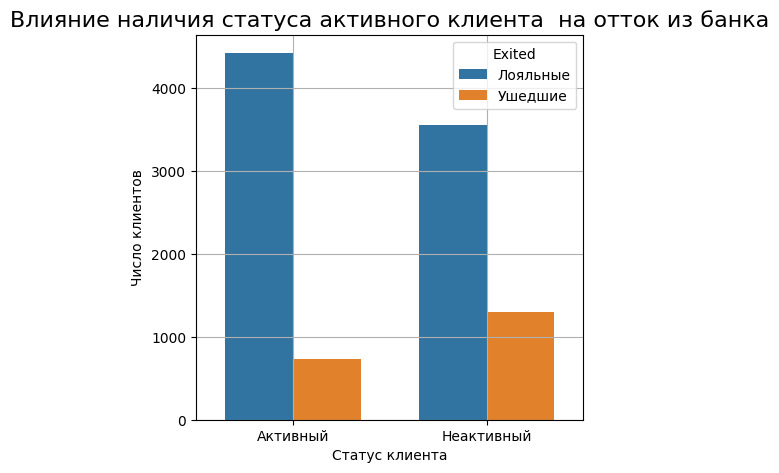

In [20]:

fig=plt.figure(figsize=(5,5))
countplot = sns.countplot(
    data=churn_data_copy,
    x='IsActiveMember',
    hue='Exited',
    width=0.7

)
countplot.set_title('Влияние наличия статуса активного клиента  на отток из банка', fontsize=16);
countplot.set_xlabel('Статус клиента');
countplot.set_ylabel('Число клиентов');
countplot.grid()

**Вывод:** среди ушедших клиентов около 1300 неактивных. Среди лояльных клиентов около 3500 неактивных. Банку следует более активно работать с неактивными клиентами, предлагать им различные новые программы. Так видимо на данный момент условия программ неактивным клиентам неинтересны.

##### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [21]:
churn_countries=churn_data.groupby(['Geography'], as_index=False)['Exited'].mean()
churn_countries

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


In [23]:
fig = px.choropleth(
    churn_countries,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    title='Отток клиентов по странам',
    color_continuous_scale='Reds'
)
fig.update_geos(fitbounds='locations')
fig.show()


**Вывод:** наибольший отток клиентов произошел в Германии. Возможно там есть серьезный конкурент для нашего банка. Нужны локальные решения.



##### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

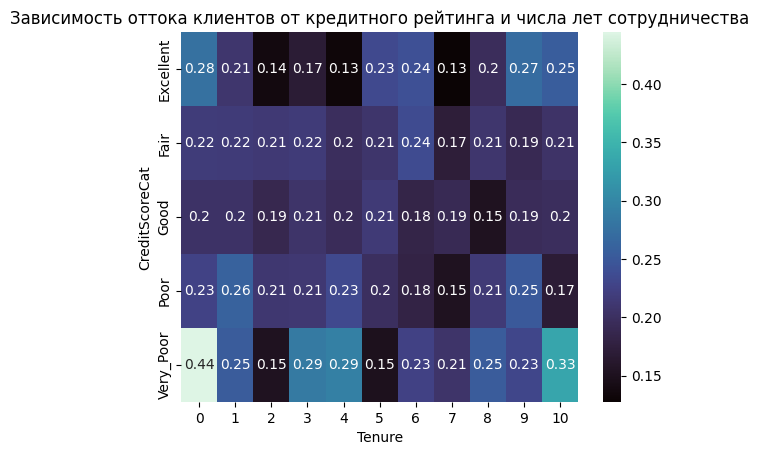

In [24]:
def get_credit_score_cat(credit_score):
     if credit_score >= 300 and credit_score < 500:
         return "Very_Poor"
     elif credit_score >= 500 and credit_score < 601:
         return "Poor"
     elif credit_score >= 601 and credit_score < 661:
         return "Fair"
     elif credit_score >= 661 and credit_score < 781:
         return "Good"
     elif credit_score >= 851:
         return "Top"
     elif credit_score >= 781 and credit_score < 851:
         return "Excellent"
     elif credit_score < 300:
         return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
     values='Exited',
     index='CreditScoreCat',
     columns='Tenure'
   
 )
fig = plt.figure()
ax = sns.heatmap(data=pivot, cmap='mako', annot=True);
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества');

**Вывод:** чаще всего уходят клиенты с очень плохим кредитным рейтингом, которые только начали пользовать услугами банка. Также среди ушедших есть и те, кто давно пользуется услугами банка (10 лет) и у них низкий кредитный рейтинг.